# Excess Monthly Returns — Distributions

Clean notebook with a single setup/import cell, one data-loading step, and three comparison plots:
- Overlaid histogram bars (density)
- Overlaid line histograms (density)
- Overlaid smooth KDE curves (density)

Run top-to-bottom. Change `DATA_FILE` in the Config cell if needed.

In [3]:
from pathlib import Path
import sys
sys.path.insert(0, str(Path("..") / "src"))

# Setup: dependencies and styling
try:
    import pandas as pd
    import numpy as np
    import seaborn as sns
    import matplotlib.pyplot as plt
    from scipy.stats import gaussian_kde
    from IPython.display import display
except ImportError:
    import sys, subprocess
    subprocess.check_call([sys.executable, '-m', 'pip', 'install', 'pandas', 'numpy', 'matplotlib', 'seaborn', 'scipy'])
    import pandas as pd
    import numpy as np
    import seaborn as sns
    import matplotlib.pyplot as plt
    from scipy.stats import gaussian_kde
    from IPython.display import display

sns.set_theme(style='whitegrid')
pd.options.display.float_format = '{:,.12f}'.format
plt.rcParams['figure.dpi'] = 120
print('Libraries ready.')

Libraries ready.


In [4]:
# Config: choose dataset
from pathlib import Path
from finance_data.datasets import ensure_french_datasets

DATA_DIR = Path("../data")
datasets = ensure_french_datasets(output_dir=DATA_DIR, refresh=False)
DATA_FILE = datasets["paths"]["excess_49"]
print("Using 49-industry excess:", DATA_FILE)

DATE_COL_HINTS = ["date", "timestamp", "time"]


Using 49-industry excess: ../data/french49_excess_monthly.csv


In [5]:
# Load data and prepare numeric frame
df = datasets['excess_49'].copy()
df.index.name = df.index.name or 'date'
numeric_df = df.select_dtypes(include='number')
print(f'Loaded {DATA_FILE} | shape={df.shape} | numeric_cols={len(numeric_df.columns)}')
display(df.head())
display(numeric_df.describe().T)


Loaded ../data/french49_excess_monthly.csv | shape=(1191, 49) | numeric_cols=49


,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
Date,,,,,,,,,,,,,,,,,,,,,
1926-07-31,0.021400000000,-0.001300000000,NaN,-0.054100000000,0.010700000000,0.084300000000,0.022700000000,0.499900000000,-0.007100000000,0.078600000000,...,0.074800000000,0.017100000000,-0.240100000000,-0.001400000000,0.016600000000,0.043900000000,-0.007600000000,0.026800000000,-0.059900000000,0.049800000000
1926-08-31,0.019800000000,0.024600000000,NaN,0.267800000000,0.062700000000,0.165600000000,-0.010100000000,0.427300000000,-0.038300000000,-0.027500000000,...,-0.026200000000,0.046000000000,0.051400000000,-0.010100000000,-0.003800000000,0.104600000000,0.023200000000,0.050600000000,0.000700000000,0.065100000000
1926-09-30,-0.008000000000,0.013600000000,NaN,0.037900000000,0.010300000000,0.081000000000,0.062500000000,-0.051400000000,0.004900000000,-0.007300000000,...,-0.057700000000,-0.001300000000,-0.081000000000,0.000200000000,-0.007900000000,-0.020300000000,0.004900000000,-0.032900000000,-0.050600000000,-0.038100000000
1926-10-31,-0.007800000000,-0.039900000000,NaN,-0.036300000000,0.007500000000,-0.017200000000,-0.054100000000,0.050500000000,-0.049800000000,-0.002000000000,...,-0.054000000000,-0.029500000000,-0.157000000000,-0.025100000000,-0.044300000000,-0.122500000000,-0.046000000000,-0.060700000000,-0.012700000000,-0.087900000000
1926-11-30,0.064400000000,0.059500000000,NaN,0.069800000000,0.042500000000,-0.003100000000,0.015200000000,-0.069300000000,-0.008400000000,0.015600000000,...,0.035400000000,0.013000000000,0.043600000000,0.062300000000,0.040200000000,-0.023300000000,0.032700000000,0.019000000000,0.048200000000,0.038500000000


,count,mean,std,min,25%,50%,75%,max
Agric,"1,191.000000000000",0.007132913518,0.074439696477,-0.365100000000,-0.034000000000,0.004300000000,0.045600000000,0.913200000000
Food,"1,191.000000000000",0.006541645676,0.047242389582,-0.283700000000,-0.017400000000,0.008000000000,0.031400000000,0.326100000000
Soda,747.000000000000,0.007584872825,0.061672929773,-0.272500000000,-0.024050000000,0.009500000000,0.042100000000,0.385800000000
Beer,"1,191.000000000000",0.008697649034,0.070552970347,-0.294600000000,-0.024250000000,0.006400000000,0.039900000000,0.875700000000
Smoke,"1,191.000000000000",0.008924937028,0.058236758075,-0.253500000000,-0.025000000000,0.010400000000,0.043700000000,0.329500000000
Toys,"1,191.000000000000",0.006446347607,0.092263104244,-0.434000000000,-0.047000000000,0.006300000000,0.054750000000,0.752300000000
Fun,"1,191.000000000000",0.010092863140,0.093563992344,-0.443400000000,-0.035000000000,0.009700000000,0.057750000000,0.793600000000
Books,"1,191.000000000000",0.006971368598,0.078299267486,-0.347900000000,-0.032200000000,0.004900000000,0.043200000000,0.549800000000
Hshld,"1,191.000000000000",0.006263727960,0.057419974660,-0.350000000000,-0.021700000000,0.007300000000,0.038200000000,0.583000000000
Clths,"1,191.000000000000",0.006175818640,0.062357824869,-0.315100000000,-0.025300000000,0.006300000000,0.038750000000,0.413000000000


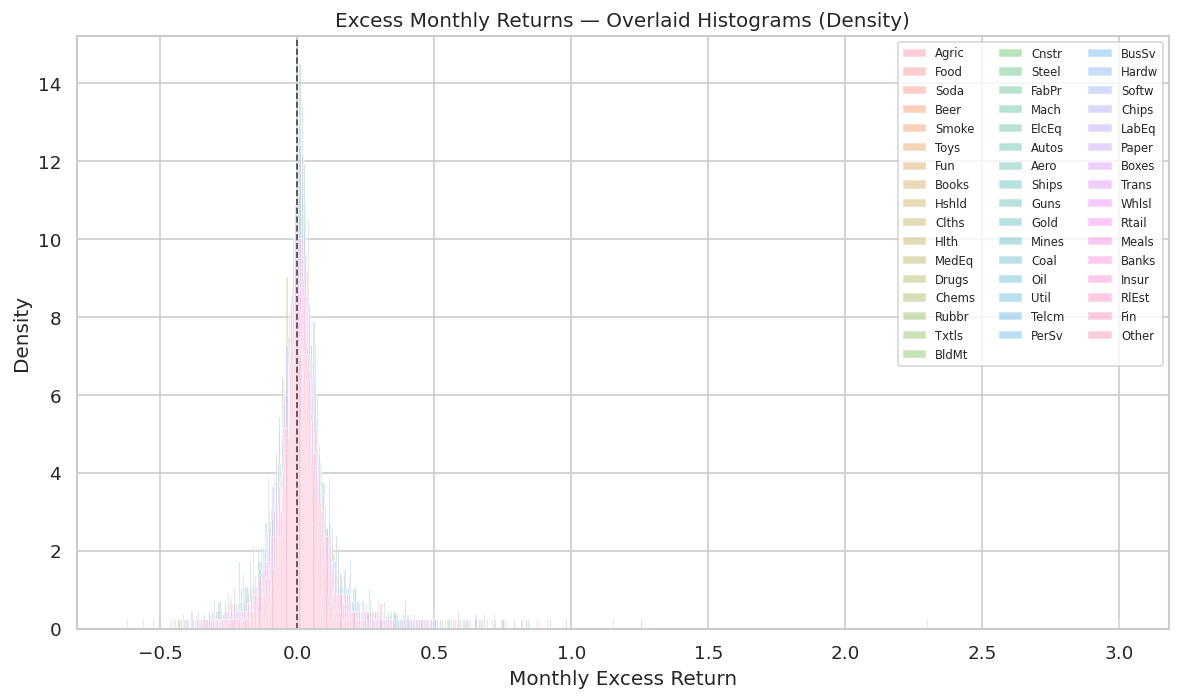

In [6]:
# Overlaid histograms (bars) — density
num_cols = list(numeric_df.columns)
if not num_cols:
    print('No numeric columns to plot.')
else:
    all_vals = pd.concat([numeric_df[c].astype(float).dropna() for c in num_cols])
    try:
        bin_edges = np.histogram_bin_edges(all_vals.values, bins='fd')
    except Exception:
        bin_edges = np.histogram_bin_edges(all_vals.values, bins=50)
    BIN_EDGES = bin_edges

    fig, ax = plt.subplots(figsize=(10, 6))
    palette = sns.color_palette('tab20', n_colors=min(20, max(3, len(num_cols))))
    if len(palette) < len(num_cols):
        palette = sns.color_palette('husl', n_colors=len(num_cols))
    for i, col in enumerate(num_cols):
        data = numeric_df[col].astype(float).dropna().values
        color = palette[i % len(palette)]
        ax.hist(data, bins=bin_edges, density=True, alpha=0.35, label=col, color=color)
    ax.axvline(0.0, color='black', linestyle='--', linewidth=1, alpha=0.7)
    ax.set_title('Excess Monthly Returns — Overlaid Histograms (Density)')
    ax.set_xlabel('Monthly Excess Return')
    ax.set_ylabel('Density')
    ax.legend(fontsize=7, ncol=3, frameon=True, loc='upper right')
    plt.tight_layout()
    plt.show()

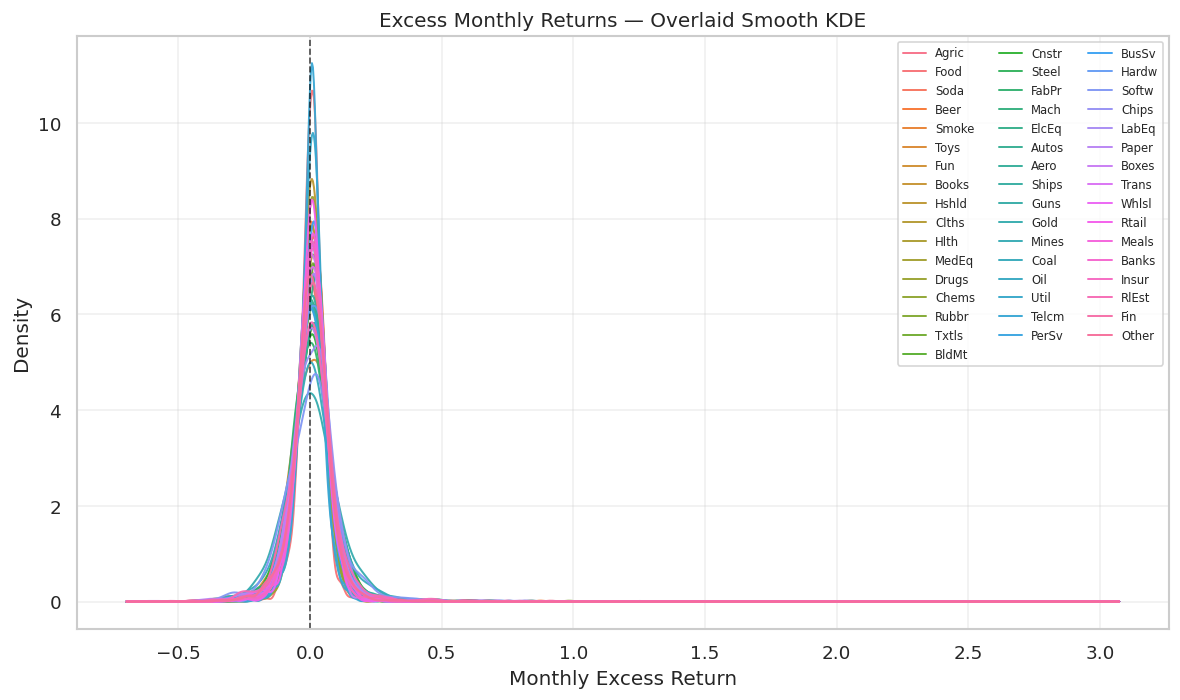

In [7]:
# Overlaid smooth KDE curves
num_cols = list(numeric_df.columns)
if not num_cols:
    print('No numeric columns to plot.')
else:
    all_vals = pd.concat([numeric_df[c].astype(float).dropna() for c in num_cols]).values
    x_lo = float(np.nanmin(all_vals))
    x_hi = float(np.nanmax(all_vals))
    rng = x_hi - x_lo
    if np.isfinite(rng) and rng > 0:
        pad = 0.02 * rng
        x_lo -= pad
        x_hi += pad
    x = np.linspace(x_lo, x_hi, 1024)

    fig, ax = plt.subplots(figsize=(10, 6))
    palette = sns.color_palette('tab20', n_colors=min(20, max(3, len(num_cols))))
    if len(palette) < len(num_cols):
        palette = sns.color_palette('husl', n_colors=len(num_cols))
    skipped = []
    for i, col in enumerate(num_cols):
        data = numeric_df[col].astype(float).dropna().values
        if np.unique(data).size < 2:
            skipped.append(col)
            continue
        kde = gaussian_kde(data)
        y = kde(x)
        color = palette[i % len(palette)]
        ax.plot(x, y, label=col, color=color, alpha=0.95, linewidth=1.2)
    ax.axvline(0.0, color='black', linestyle='--', linewidth=1, alpha=0.7)
    ax.set_title('Excess Monthly Returns — Overlaid Smooth KDE')
    ax.set_xlabel('Monthly Excess Return')
    ax.set_ylabel('Density')
    ax.legend(fontsize=7, ncol=3, frameon=True, loc='upper right')
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    if skipped:
        print('Skipped (insufficient variance):', ', '.join(skipped))

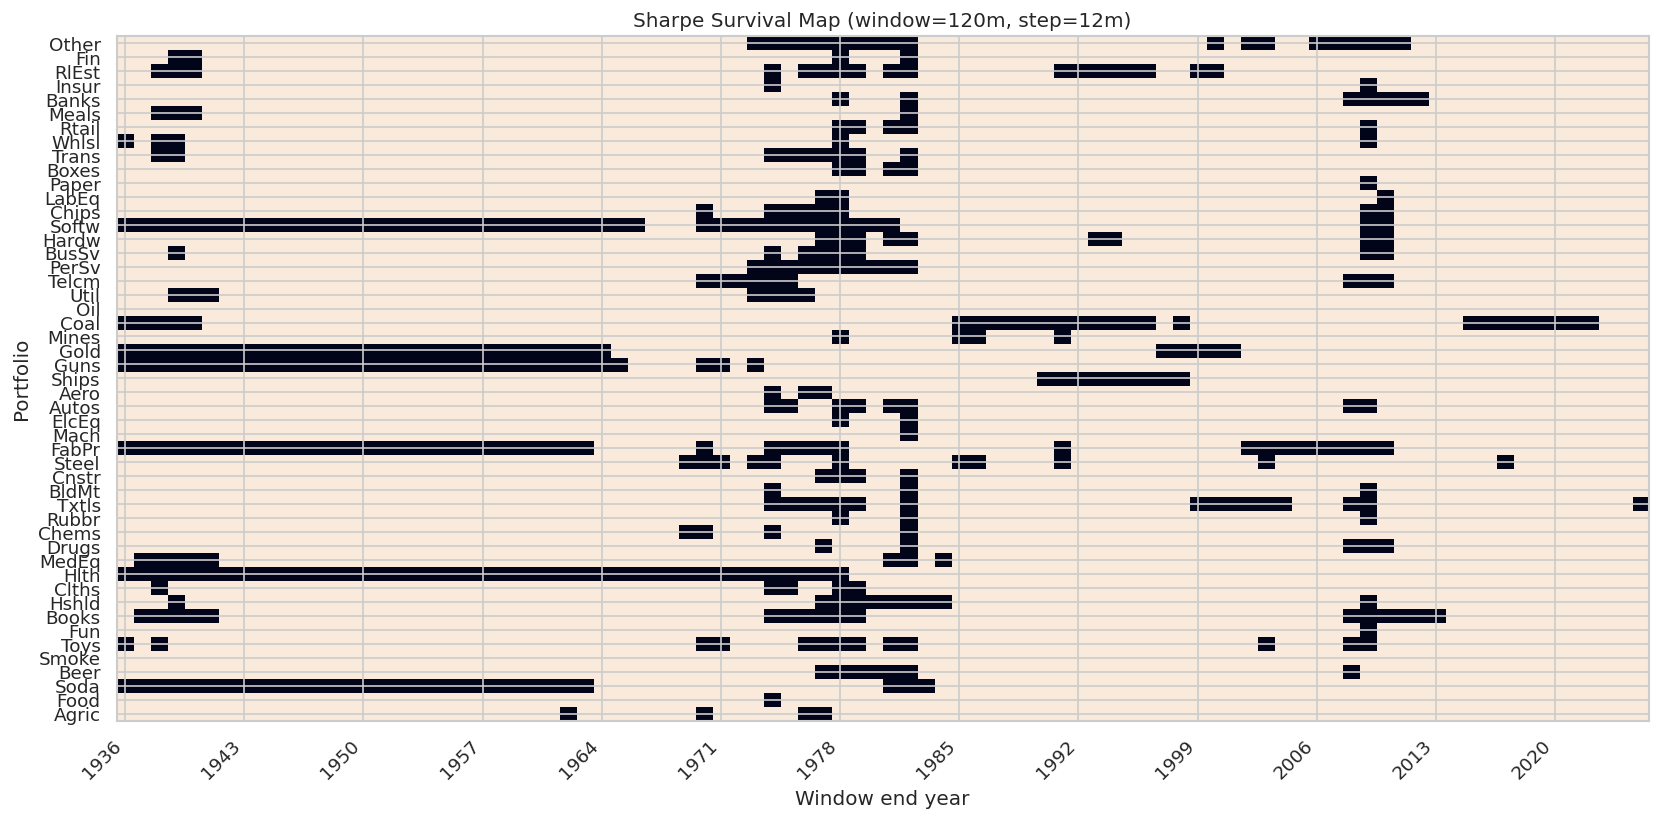

In [8]:
# Sharpe survival map (rolling SR>0)
from finance_data.survival import compute_survival_map, plot_survival_map

WINDOW = 120
STEP = 12
sr_map, survival_map, meta = compute_survival_map(numeric_df, window=WINDOW, step=STEP)
fig = plot_survival_map(
    survival_map,
    columns=meta["columns"],
    window_end_dates=meta["window_end_dates"],
    title=f"Sharpe Survival Map (window={WINDOW}m, step={STEP}m)",
)
if fig:
    plt.show()
